In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc
from collections import Counter
from sklearn.decomposition import PCA


def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

Populating the interactive namespace from numpy and matplotlib


In [8]:
def generateData(N,d,K,p,mi,Sigma):
    A = np.linalg.cholesky(Sigma.T).T
    distributions = np.random.choice(np.arange(0,K), N, p=p)
    X = np.random.randn(d,N)
    for i in range(N):
        X[:,i] = mi[:,distributions[i]] + np.dot(A[:,:,distributions[i]], X[:,i])
    return X, distributions

def plotData_KMeans(N,d,K,p,mi,Sigma):
    X, groups = generateData(N,d,K,p,mi,Sigma)
    R, m = KMeans(K, X)
    res = PCA(n_components=2).fit_transform(X.T)
    
    
    plt.figure(figsize=(16,8))
    plt.subplot(221)
    plt.scatter(X[0,:], X[1,:], marker='.', c=groups)
    
    plt.subplot(222)
    plt.scatter(X[0,:], X[1,:], marker='.', c=m)
    plt.scatter(R[0,:], R[1,:], c='red')
    
    plt.subplot(223)
    print(res.shape, m.shape)
    plt.scatter(res[:,0], res[:,1], c=m, marker='.')
    

(100000, 2) (100000,)


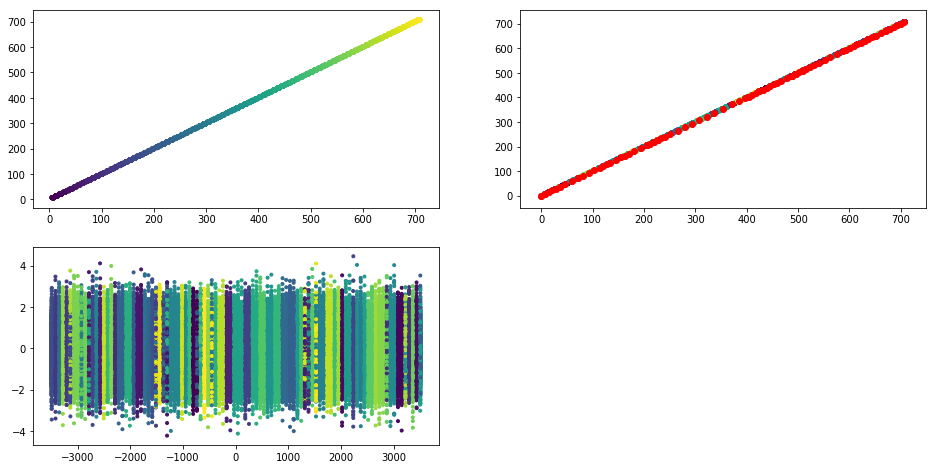

In [11]:
N = 100000
d = 100
K = 100

p = 1/K * np.ones(K)
Sigma = np.array([np.eye(d) for i in range(K)]).T

q = 10
dist = q/np.sqrt(2)
mi = dist * np.ones((d,1)) * np.arange(1,K+1)


plotData_KMeans(N,d,K,p,mi,Sigma)